### gather and format data

In [69]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.contrib.tensor_forest.python import tensor_forest
from tensorflow.python.ops import resources
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import h5py

df = pd.read_csv('sensors_1.csv')
df.columns = ['1', '2', '3', '4', 'd1', 'd2', 'd3', 'd4', 'hours', 'minutes', 'seconds']

flow = pd.read_csv('Flow_1.csv')
flow.columns = ['Flow']

df.head()

,1,2,3,4,d1,d2,d3,d4,hours,minutes,seconds
0,0.440000,0.432000,0.456000,0.497778,0.000000,0.000000,0.000000,0.000000,15.0,4.0,34.451422
1,0.440000,0.436000,0.460000,0.497778,0.000000,0.195197,0.195197,0.000000,15.0,4.0,34.461668
2,0.434667,0.431979,0.461340,0.500741,-0.163603,-0.042012,0.165049,0.090891,15.0,4.0,34.472535
3,0.431968,0.429958,0.459996,0.499995,-0.192717,-0.100917,0.074816,0.042338,15.0,4.0,34.483387
4,0.431975,0.427120,0.460805,0.499548,-0.139941,-0.153101,0.074830,0.020195,15.0,4.0,34.494189


In [70]:
flow.head()

,Flow
0,23.876163
1,25.924320
2,24.970956
3,24.909395
4,24.410650


In [71]:
def movingAvg(Class, windowSize):
    """
    Create moving average to remove single outliers

    Args:
        Class (list): List of inhale / exhale classes
        Windowsize (int): Size of moving average window

    Returns:
        filteredClass (list): Filtered list of classes
    """
    
    filteredClass = []
    for i in range(0, len(Class)):

        if i < windowSize - 1:
            filteredClass.append(Class[i])

        elif Class[i] != Class[i - 1]:
            if sum(Class[i - (windowSize - 1):(i + 1)]) / windowSize > 1:
                filteredClass.append(2)

            elif sum(Class[i - (windowSize - 1):(i + 1)]) / windowSize < 1:
                filteredClass.append(0)

            else:
                filteredClass.append(Class[i])

        elif Class[i] == Class[i - 1]:
            filteredClass.append(Class[i])
            
    return filteredClass

def classSwitch(Class):
    """
    Class switch function to filter 3 classifiers down to 2 (inhale and exhale)

    Args:
        Class (list): List of inhale / exhale classes

    Returns:
        decisionClass (list): Filtered (with moving average) of resulting simplified class
    """

    decision = []
    for i in range(0, len(Class)):
        
        if Class[i] == 1:
            decision.append(1)
            
        elif Class[i] == 0:
            decision.append(0)
            
        elif Class[i] == 2:
            if len(decision) > 1:
                decision.append(decision[-1])
            else:
                decision.append(2)
            
    return movingAvg(decision, 3)

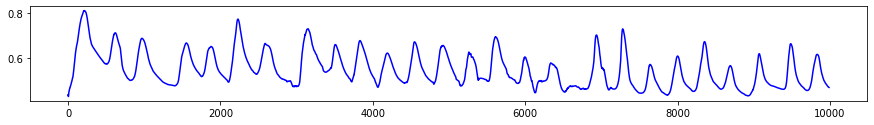

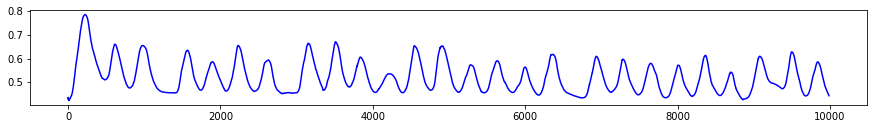

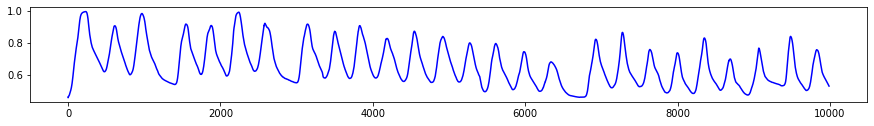

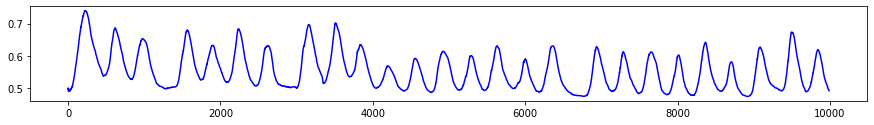

In [72]:
x = range(0, len(df))
fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,1)
plt.plot(x, df['1'], 'b')
plt.show()

fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,2)
plt.plot(x, df['2'], 'b')
plt.show()

fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,3)
plt.plot(x, df['3'], 'b')
plt.show()

fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,4)
plt.plot(x, df['4'], 'b')
plt.show()

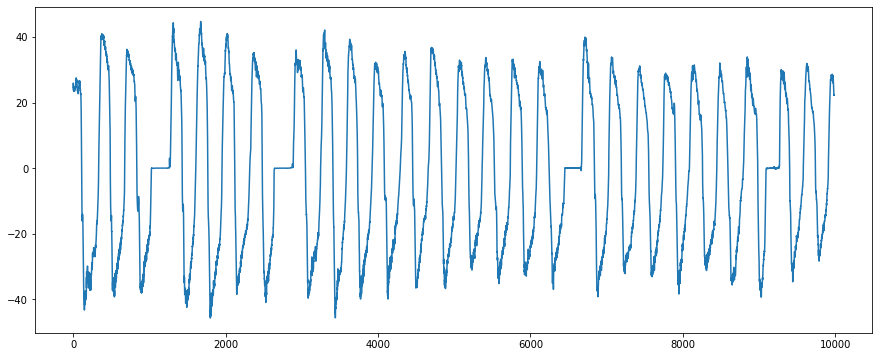

In [73]:
fig = plt.figure(figsize = (15, 6))
plt.plot(flow['Flow'])

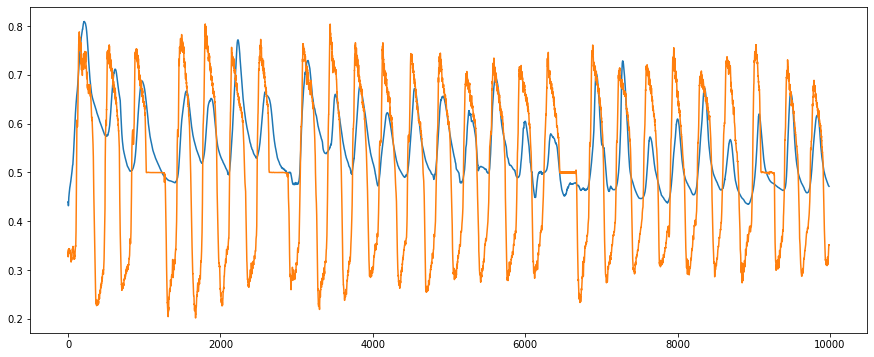

In [74]:
flow['a'] = (flow['Flow'] / 150) - 0.5
fig = plt.figure(figsize = (15, 6))
plt.plot(x, df['1'], x, flow['a']*-1)

In [75]:
flow.drop('a', inplace = True, axis = 1)

In [76]:
def label_fix(label):
    if label < -22:
        return 0
    elif label > 22:
        return 1
    else:
        return 2

df['Class'] = flow['Flow'].apply(label_fix)

In [77]:
df.head()

,1,2,3,4,d1,d2,d3,d4,hours,minutes,seconds,Class
0,0.440000,0.432000,0.456000,0.497778,0.000000,0.000000,0.000000,0.000000,15.0,4.0,34.451422,1
1,0.440000,0.436000,0.460000,0.497778,0.000000,0.195197,0.195197,0.000000,15.0,4.0,34.461668,1
2,0.434667,0.431979,0.461340,0.500741,-0.163603,-0.042012,0.165049,0.090891,15.0,4.0,34.472535,1
3,0.431968,0.429958,0.459996,0.499995,-0.192717,-0.100917,0.074816,0.042338,15.0,4.0,34.483387,1
4,0.431975,0.427120,0.460805,0.499548,-0.139941,-0.153101,0.074830,0.020195,15.0,4.0,34.494189,1


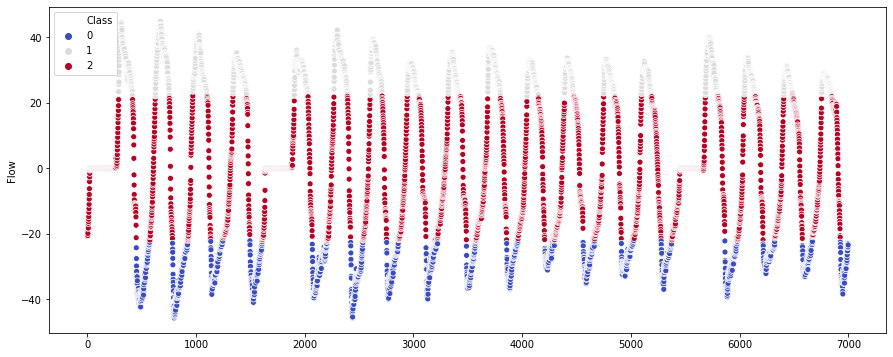

In [78]:
fig = plt.figure(figsize = (15, 6))
sns.scatterplot(y = flow['Flow'][1000:8000], x = range(0, 7000), hue = df['Class'][1000:8000], palette = 'coolwarm')

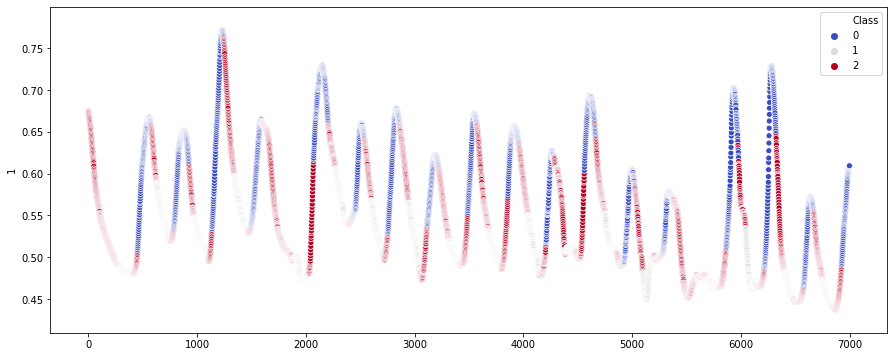

In [79]:
fig = plt.figure(figsize = (15, 6))
sns.scatterplot(y = df['1'][1000:8000], x = range(0, 7000), hue = df['Class'][1000:8000], palette = 'coolwarm')

In [80]:
df.head()

,1,2,3,4,d1,d2,d3,d4,hours,minutes,seconds,Class
0,0.440000,0.432000,0.456000,0.497778,0.000000,0.000000,0.000000,0.000000,15.0,4.0,34.451422,1
1,0.440000,0.436000,0.460000,0.497778,0.000000,0.195197,0.195197,0.000000,15.0,4.0,34.461668,1
2,0.434667,0.431979,0.461340,0.500741,-0.163603,-0.042012,0.165049,0.090891,15.0,4.0,34.472535,1
3,0.431968,0.429958,0.459996,0.499995,-0.192717,-0.100917,0.074816,0.042338,15.0,4.0,34.483387,1
4,0.431975,0.427120,0.460805,0.499548,-0.139941,-0.153101,0.074830,0.020195,15.0,4.0,34.494189,1


In [81]:
# Create the data matrix
X = df.drop('Class', axis = 1)
X.drop('hours', inplace = True, axis = 1)
X.drop('minutes', inplace = True, axis = 1)
X.drop('seconds', inplace = True, axis = 1)

# Create the classification matrix
y = df['Class']
y = pd.DataFrame(y, index = None, columns = ['Class'])

# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
y_test.reset_index(inplace = True, drop = True)
y_train.reset_index(inplace = True, drop = True)

In [82]:
len(X)

9989

### model training - deep learning

In [14]:
# Develop keras sequential model with optimized parameters through grid search cv
model = keras.Sequential()
model.add(keras.layers.Dense(150, activation = tf.nn.relu, input_dim = 8))
model.add(keras.layers.Dropout(0.3))
#model.add(keras.layers.Dense(125, activation = tf.nn.relu))
#model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(100, activation = tf.nn.relu))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(50, activation = tf.nn.relu))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(3, activation = tf.nn.softmax))

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()

W1108 10:53:27.626888 4753079744 deprecation.py:506] From /Users/mikefurr/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 150)               1350      
_________________________________________________________________
dropout (Dropout)            (None, 150)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               15100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 1

In [15]:
EPOCHS = 5000
model.fit(X_train, y_train, epochs = EPOCHS)

Epoch 1/5000
6992/6992 [==============================] - 0s 43us/sample - loss: 0.7946 - acc: 0.6340
Epoch 2/5000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.6566 - acc: 0.6856
Epoch 3/5000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.6055 - acc: 0.6944
Epoch 4/5000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.5813 - acc: 0.7054
Epoch 5/5000
6992/6992 [==============================] - 0s 28us/sample - loss: 0.5692 - acc: 0.7154
Epoch 6/5000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.5582 - acc: 0.7168
Epoch 7/5000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.5484 - acc: 0.7347
Epoch 8/5000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.5381 - acc: 0.7457
Epoch 9/5000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.5231 - acc: 0.7501
Epoch 10/5000
6992/6992 [==============================] - 0s 27us/sample - loss: 

6992/6992 [==============================] - 0s 26us/sample - loss: 0.3574 - acc: 0.8400
Epoch 160/5000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.3470 - acc: 0.8470
Epoch 161/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.3376 - acc: 0.8518
Epoch 162/5000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.3358 - acc: 0.8500
Epoch 163/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.3372 - acc: 0.8510
Epoch 164/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.3457 - acc: 0.8420
Epoch 165/5000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.3361 - acc: 0.8495
Epoch 166/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.3496 - acc: 0.8495
Epoch 167/5000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.3402 - acc: 0.8491
Epoch 168/5000
6992/6992 [==============================] - 0s 26us/sample - lo

6992/6992 [==============================] - 0s 25us/sample - loss: 0.3131 - acc: 0.8626
Epoch 316/5000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.3085 - acc: 0.8667
Epoch 317/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.2945 - acc: 0.8724
Epoch 318/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.3056 - acc: 0.8667
Epoch 319/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.3102 - acc: 0.8623
Epoch 320/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.2913 - acc: 0.8741
Epoch 321/5000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.2924 - acc: 0.8729
Epoch 322/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.3061 - acc: 0.8647
Epoch 323/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.2979 - acc: 0.8707
Epoch 324/5000
6992/6992 [==============================] - 0s 28us/sample - lo

6992/6992 [==============================] - 0s 26us/sample - loss: 0.2657 - acc: 0.8843
Epoch 472/5000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.2739 - acc: 0.8830
Epoch 473/5000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.2699 - acc: 0.8842
Epoch 474/5000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.2717 - acc: 0.8829
Epoch 475/5000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.2823 - acc: 0.8796
Epoch 476/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.2704 - acc: 0.8840
Epoch 477/5000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.2702 - acc: 0.8846
Epoch 478/5000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.2699 - acc: 0.8826
Epoch 479/5000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.2810 - acc: 0.8776
Epoch 480/5000
6992/6992 [==============================] - 0s 26us/sample - lo

6992/6992 [==============================] - 0s 26us/sample - loss: 0.2575 - acc: 0.8920
Epoch 628/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.2446 - acc: 0.8960
Epoch 629/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.2568 - acc: 0.8933
Epoch 630/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.2711 - acc: 0.8829
Epoch 631/5000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.2661 - acc: 0.8873
Epoch 632/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.2692 - acc: 0.8867
Epoch 633/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.2603 - acc: 0.8902
Epoch 634/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.2558 - acc: 0.8897
Epoch 635/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.2622 - acc: 0.8907
Epoch 636/5000
6992/6992 [==============================] - 0s 26us/sample - lo

6992/6992 [==============================] - 0s 27us/sample - loss: 0.2441 - acc: 0.8967
Epoch 784/5000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.2507 - acc: 0.8963
Epoch 785/5000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.2469 - acc: 0.8940
Epoch 786/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.2554 - acc: 0.8913
Epoch 787/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.2530 - acc: 0.8930
Epoch 788/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.2646 - acc: 0.8849
Epoch 789/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.2571 - acc: 0.8913
Epoch 790/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.2558 - acc: 0.8909
Epoch 791/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.2443 - acc: 0.8953
Epoch 792/5000
6992/6992 [==============================] - 0s 27us/sample - lo

6992/6992 [==============================] - 0s 26us/sample - loss: 0.2366 - acc: 0.9003
Epoch 940/5000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.2368 - acc: 0.8999
Epoch 941/5000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.2413 - acc: 0.8977
Epoch 942/5000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.2352 - acc: 0.9029
Epoch 943/5000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.2441 - acc: 0.8979
Epoch 944/5000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.2404 - acc: 0.8986
Epoch 945/5000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.2337 - acc: 0.8997
Epoch 946/5000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.2343 - acc: 0.8992
Epoch 947/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.2268 - acc: 0.9042
Epoch 948/5000
6992/6992 [==============================] - 0s 26us/sample - lo

6992/6992 [==============================] - 0s 27us/sample - loss: 0.2250 - acc: 0.9035
Epoch 1096/5000
6992/6992 [==============================] - 0s 28us/sample - loss: 0.2454 - acc: 0.9006
Epoch 1097/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.2373 - acc: 0.9036
Epoch 1098/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.2432 - acc: 0.8993
Epoch 1099/5000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.2330 - acc: 0.9029
Epoch 1100/5000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.2399 - acc: 0.9025
Epoch 1101/5000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.2315 - acc: 0.8997
Epoch 1102/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.2298 - acc: 0.9023
Epoch 1103/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.2393 - acc: 0.9003
Epoch 1104/5000
6992/6992 [==============================] - 0s 26us/sa

6992/6992 [==============================] - 0s 25us/sample - loss: 0.2209 - acc: 0.9080
Epoch 1252/5000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.2231 - acc: 0.9075
Epoch 1253/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.2257 - acc: 0.9049
Epoch 1254/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.2147 - acc: 0.9126
Epoch 1255/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.2294 - acc: 0.9053
Epoch 1256/5000
6992/6992 [==============================] - 0s 28us/sample - loss: 0.2255 - acc: 0.8992
Epoch 1257/5000
6992/6992 [==============================] - 0s 30us/sample - loss: 0.2302 - acc: 0.9085
Epoch 1258/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.2173 - acc: 0.9079
Epoch 1259/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.2381 - acc: 0.9030
Epoch 1260/5000
6992/6992 [==============================] - 0s 28us/sa

6992/6992 [==============================] - 0s 26us/sample - loss: 0.2190 - acc: 0.9076
Epoch 1408/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.2164 - acc: 0.9113
Epoch 1409/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.2164 - acc: 0.9110
Epoch 1410/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.2131 - acc: 0.9113
Epoch 1411/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.2213 - acc: 0.9050
Epoch 1412/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.2211 - acc: 0.9073
Epoch 1413/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.2164 - acc: 0.9118
Epoch 1414/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.2300 - acc: 0.9013
Epoch 1415/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.2197 - acc: 0.9073
Epoch 1416/5000
6992/6992 [==============================] - 0s 28us/sa

6992/6992 [==============================] - 0s 26us/sample - loss: 0.1996 - acc: 0.9156
Epoch 1564/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.2151 - acc: 0.9112
Epoch 1565/5000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.2193 - acc: 0.9086
Epoch 1566/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.2136 - acc: 0.9108
Epoch 1567/5000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.2286 - acc: 0.8999
Epoch 1568/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.2182 - acc: 0.9093
Epoch 1569/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.2088 - acc: 0.9145
Epoch 1570/5000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.2066 - acc: 0.9166
Epoch 1571/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.2110 - acc: 0.9113
Epoch 1572/5000
6992/6992 [==============================] - 0s 26us/sa

6992/6992 [==============================] - 0s 26us/sample - loss: 0.2155 - acc: 0.9153
Epoch 1720/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.2114 - acc: 0.9143
Epoch 1721/5000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.2123 - acc: 0.9126
Epoch 1722/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.2051 - acc: 0.9166
Epoch 1723/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.2159 - acc: 0.9100
Epoch 1724/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.2031 - acc: 0.9169
Epoch 1725/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.2142 - acc: 0.9095
Epoch 1726/5000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.2153 - acc: 0.9098
Epoch 1727/5000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.2224 - acc: 0.9118
Epoch 1728/5000
6992/6992 [==============================] - 0s 26us/sa

6992/6992 [==============================] - 0s 26us/sample - loss: 0.2253 - acc: 0.9088
Epoch 1876/5000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.2094 - acc: 0.9142
Epoch 1877/5000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.2111 - acc: 0.9123
Epoch 1878/5000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.2085 - acc: 0.9125
Epoch 1879/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.2061 - acc: 0.9156
Epoch 1880/5000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.1974 - acc: 0.9159
Epoch 1881/5000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.2024 - acc: 0.9191
Epoch 1882/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.2113 - acc: 0.9120
Epoch 1883/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.2110 - acc: 0.9152
Epoch 1884/5000
6992/6992 [==============================] - 0s 27us/sa

6992/6992 [==============================] - 0s 25us/sample - loss: 0.1984 - acc: 0.9166
Epoch 2032/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.2160 - acc: 0.9080
Epoch 2033/5000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.2170 - acc: 0.9119
Epoch 2034/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.2054 - acc: 0.9116
Epoch 2035/5000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.2078 - acc: 0.9163
Epoch 2036/5000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.2012 - acc: 0.9158
Epoch 2037/5000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.1974 - acc: 0.9166
Epoch 2038/5000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.1924 - acc: 0.9218
Epoch 2039/5000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.1965 - acc: 0.9185
Epoch 2040/5000
6992/6992 [==============================] - 0s 25us/sa

6992/6992 [==============================] - 0s 28us/sample - loss: 0.1869 - acc: 0.9231
Epoch 2188/5000
6992/6992 [==============================] - 0s 31us/sample - loss: 0.2039 - acc: 0.9176
Epoch 2189/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.2088 - acc: 0.9149
Epoch 2190/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.2081 - acc: 0.9150
Epoch 2191/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.2020 - acc: 0.9166
Epoch 2192/5000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.1946 - acc: 0.9182
Epoch 2193/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1946 - acc: 0.9208
Epoch 2194/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1962 - acc: 0.9188
Epoch 2195/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1942 - acc: 0.9203
Epoch 2196/5000
6992/6992 [==============================] - 0s 26us/sa

6992/6992 [==============================] - 0s 26us/sample - loss: 0.1980 - acc: 0.9176
Epoch 2344/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1893 - acc: 0.9233
Epoch 2345/5000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.1919 - acc: 0.9251
Epoch 2346/5000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.2035 - acc: 0.9152
Epoch 2347/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1934 - acc: 0.9212
Epoch 2348/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1843 - acc: 0.9272
Epoch 2349/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1951 - acc: 0.9178
Epoch 2350/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1868 - acc: 0.9255
Epoch 2351/5000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.2014 - acc: 0.9176
Epoch 2352/5000
6992/6992 [==============================] - 0s 25us/sa

6992/6992 [==============================] - 0s 26us/sample - loss: 0.1945 - acc: 0.9195
Epoch 2500/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1990 - acc: 0.9199
Epoch 2501/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1929 - acc: 0.9222
Epoch 2502/5000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.1919 - acc: 0.9203
Epoch 2503/5000
6992/6992 [==============================] - 0s 33us/sample - loss: 0.1916 - acc: 0.9268
Epoch 2504/5000
6992/6992 [==============================] - 0s 30us/sample - loss: 0.2096 - acc: 0.9160
Epoch 2505/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1975 - acc: 0.9156
Epoch 2506/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1960 - acc: 0.9196
Epoch 2507/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1966 - acc: 0.9201
Epoch 2508/5000
6992/6992 [==============================] - 0s 25us/sa

6992/6992 [==============================] - 0s 26us/sample - loss: 0.1975 - acc: 0.9173
Epoch 2656/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1988 - acc: 0.9169
Epoch 2657/5000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.1819 - acc: 0.9241
Epoch 2658/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1933 - acc: 0.9255
Epoch 2659/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1904 - acc: 0.9232
Epoch 2660/5000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.2018 - acc: 0.9183
Epoch 2661/5000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.1909 - acc: 0.9216
Epoch 2662/5000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.1983 - acc: 0.9189
Epoch 2663/5000
6992/6992 [==============================] - 0s 30us/sample - loss: 0.1915 - acc: 0.9213
Epoch 2664/5000
6992/6992 [==============================] - 0s 42us/sa

6992/6992 [==============================] - 0s 26us/sample - loss: 0.1789 - acc: 0.9281
Epoch 2812/5000
6992/6992 [==============================] - 0s 29us/sample - loss: 0.1909 - acc: 0.9243
Epoch 2813/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1908 - acc: 0.9249
Epoch 2814/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1884 - acc: 0.9253
Epoch 2815/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1957 - acc: 0.9162
Epoch 2816/5000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.1866 - acc: 0.9263
Epoch 2817/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1941 - acc: 0.9203
Epoch 2818/5000
6992/6992 [==============================] - 0s 34us/sample - loss: 0.1858 - acc: 0.9229
Epoch 2819/5000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.1830 - acc: 0.9262
Epoch 2820/5000
6992/6992 [==============================] - 0s 26us/sa

6992/6992 [==============================] - 0s 25us/sample - loss: 0.2038 - acc: 0.9183
Epoch 2968/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1909 - acc: 0.9258
Epoch 2969/5000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.1851 - acc: 0.9261
Epoch 2970/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1911 - acc: 0.9249
Epoch 2971/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1838 - acc: 0.9255
Epoch 2972/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1916 - acc: 0.9255
Epoch 2973/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1853 - acc: 0.9259
Epoch 2974/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1936 - acc: 0.9222
Epoch 2975/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1875 - acc: 0.9252
Epoch 2976/5000
6992/6992 [==============================] - 0s 26us/sa

6992/6992 [==============================] - 0s 26us/sample - loss: 0.1888 - acc: 0.9228
Epoch 3124/5000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.1837 - acc: 0.9258
Epoch 3125/5000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.1891 - acc: 0.9231
Epoch 3126/5000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.1838 - acc: 0.9241
Epoch 3127/5000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.1980 - acc: 0.9208
Epoch 3128/5000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.1824 - acc: 0.9259
Epoch 3129/5000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.1869 - acc: 0.9242
Epoch 3130/5000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.1980 - acc: 0.9191
Epoch 3131/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1790 - acc: 0.9289
Epoch 3132/5000
6992/6992 [==============================] - 0s 25us/sa

6992/6992 [==============================] - 0s 25us/sample - loss: 0.1945 - acc: 0.9209
Epoch 3280/5000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.1886 - acc: 0.9219
Epoch 3281/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1898 - acc: 0.9236
Epoch 3282/5000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.1947 - acc: 0.9203
Epoch 3283/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1876 - acc: 0.9252
Epoch 3284/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1848 - acc: 0.9263
Epoch 3285/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1773 - acc: 0.9282
Epoch 3286/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1985 - acc: 0.9226
Epoch 3287/5000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.1887 - acc: 0.9233
Epoch 3288/5000
6992/6992 [==============================] - 0s 26us/sa

6992/6992 [==============================] - 0s 27us/sample - loss: 0.1826 - acc: 0.9259
Epoch 3436/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1893 - acc: 0.9225
Epoch 3437/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1855 - acc: 0.9286
Epoch 3438/5000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.1977 - acc: 0.9226
Epoch 3439/5000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.1859 - acc: 0.9248
Epoch 3440/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1995 - acc: 0.9219
Epoch 3441/5000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.1891 - acc: 0.9232
Epoch 3442/5000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.1821 - acc: 0.9283
Epoch 3443/5000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.1809 - acc: 0.9263
Epoch 3444/5000
6992/6992 [==============================] - 0s 26us/sa

6992/6992 [==============================] - 0s 35us/sample - loss: 0.1859 - acc: 0.9226
Epoch 3592/5000
6992/6992 [==============================] - 0s 34us/sample - loss: 0.1773 - acc: 0.9256
Epoch 3593/5000
6992/6992 [==============================] - 0s 33us/sample - loss: 0.1813 - acc: 0.9259
Epoch 3594/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1940 - acc: 0.9229
Epoch 3595/5000
6992/6992 [==============================] - 0s 30us/sample - loss: 0.1829 - acc: 0.9271
Epoch 3596/5000
6992/6992 [==============================] - 0s 31us/sample - loss: 0.1666 - acc: 0.9312
Epoch 3597/5000
6992/6992 [==============================] - 0s 28us/sample - loss: 0.1858 - acc: 0.9282
Epoch 3598/5000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.1826 - acc: 0.9314
Epoch 3599/5000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.1846 - acc: 0.9278
Epoch 3600/5000
6992/6992 [==============================] - 0s 27us/sa

6992/6992 [==============================] - 0s 26us/sample - loss: 0.1694 - acc: 0.9341
Epoch 3748/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1817 - acc: 0.9266
Epoch 3749/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1906 - acc: 0.9249
Epoch 3750/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1859 - acc: 0.9261
Epoch 3751/5000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.1892 - acc: 0.9222
Epoch 3752/5000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.1759 - acc: 0.9296
Epoch 3753/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1658 - acc: 0.9342
Epoch 3754/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1885 - acc: 0.9281
Epoch 3755/5000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.1795 - acc: 0.9273
Epoch 3756/5000
6992/6992 [==============================] - 0s 27us/sa

6992/6992 [==============================] - 0s 27us/sample - loss: 0.1790 - acc: 0.9329
Epoch 3904/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1737 - acc: 0.9299
Epoch 3905/5000
6992/6992 [==============================] - 0s 28us/sample - loss: 0.1825 - acc: 0.9306
Epoch 3906/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1903 - acc: 0.9258
Epoch 3907/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1838 - acc: 0.9246
Epoch 3908/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1864 - acc: 0.9266
Epoch 3909/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1799 - acc: 0.9268
Epoch 3910/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1709 - acc: 0.9301
Epoch 3911/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1786 - acc: 0.9282
Epoch 3912/5000
6992/6992 [==============================] - 0s 26us/sa

6992/6992 [==============================] - 0s 28us/sample - loss: 0.1771 - acc: 0.9303
Epoch 4060/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1769 - acc: 0.9288
Epoch 4061/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1813 - acc: 0.9303
Epoch 4062/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1904 - acc: 0.9223
Epoch 4063/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1643 - acc: 0.9362
Epoch 4064/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1749 - acc: 0.9263
Epoch 4065/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1686 - acc: 0.9319
Epoch 4066/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1786 - acc: 0.9269
Epoch 4067/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1809 - acc: 0.9276
Epoch 4068/5000
6992/6992 [==============================] - 0s 26us/sa

6992/6992 [==============================] - 0s 27us/sample - loss: 0.1838 - acc: 0.9306
Epoch 4216/5000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.1711 - acc: 0.9324
Epoch 4217/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1833 - acc: 0.9311
Epoch 4218/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1834 - acc: 0.9261
Epoch 4219/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1764 - acc: 0.9288
Epoch 4220/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1821 - acc: 0.9253
Epoch 4221/5000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.1736 - acc: 0.9292
Epoch 4222/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1829 - acc: 0.9298
Epoch 4223/5000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.1762 - acc: 0.9298
Epoch 4224/5000
6992/6992 [==============================] - 0s 26us/sa

6992/6992 [==============================] - 0s 26us/sample - loss: 0.1890 - acc: 0.9272
Epoch 4372/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1810 - acc: 0.9308
Epoch 4373/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1657 - acc: 0.9354
Epoch 4374/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1750 - acc: 0.9344
Epoch 4375/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1832 - acc: 0.9245
Epoch 4376/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1674 - acc: 0.9344
Epoch 4377/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1813 - acc: 0.9276
Epoch 4378/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1829 - acc: 0.9285
Epoch 4379/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1793 - acc: 0.9309
Epoch 4380/5000
6992/6992 [==============================] - 0s 27us/sa

6992/6992 [==============================] - 0s 27us/sample - loss: 0.1752 - acc: 0.9312
Epoch 4528/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1742 - acc: 0.9338
Epoch 4529/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1644 - acc: 0.9356
Epoch 4530/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1761 - acc: 0.9296
Epoch 4531/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1826 - acc: 0.9292
Epoch 4532/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1777 - acc: 0.9319
Epoch 4533/5000
6992/6992 [==============================] - 0s 28us/sample - loss: 0.1738 - acc: 0.9322
Epoch 4534/5000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.1769 - acc: 0.9325
Epoch 4535/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1635 - acc: 0.9326
Epoch 4536/5000
6992/6992 [==============================] - 0s 26us/sa

6992/6992 [==============================] - 0s 31us/sample - loss: 0.1744 - acc: 0.9302
Epoch 4684/5000
6992/6992 [==============================] - 0s 31us/sample - loss: 0.1814 - acc: 0.9282
Epoch 4685/5000
6992/6992 [==============================] - 0s 30us/sample - loss: 0.1786 - acc: 0.9272
Epoch 4686/5000
6992/6992 [==============================] - 0s 28us/sample - loss: 0.1836 - acc: 0.9266
Epoch 4687/5000
6992/6992 [==============================] - 0s 30us/sample - loss: 0.1751 - acc: 0.9302
Epoch 4688/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1731 - acc: 0.9349
Epoch 4689/5000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.1795 - acc: 0.9298
Epoch 4690/5000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1647 - acc: 0.9378
Epoch 4691/5000
6992/6992 [==============================] - 0s 28us/sample - loss: 0.1669 - acc: 0.9331
Epoch 4692/5000
6992/6992 [==============================] - 0s 29us/sa

6992/6992 [==============================] - 0s 28us/sample - loss: 0.1673 - acc: 0.9324
Epoch 4840/5000
6992/6992 [==============================] - 0s 28us/sample - loss: 0.1746 - acc: 0.9293
Epoch 4841/5000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.1827 - acc: 0.9288
Epoch 4842/5000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.1646 - acc: 0.9384
Epoch 4843/5000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.1667 - acc: 0.9325
Epoch 4844/5000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.1730 - acc: 0.9324
Epoch 4845/5000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.1706 - acc: 0.9344
Epoch 4846/5000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.1761 - acc: 0.9314
Epoch 4847/5000
6992/6992 [==============================] - 0s 28us/sample - loss: 0.1684 - acc: 0.9329
Epoch 4848/5000
6992/6992 [==============================] - 0s 27us/sa

6992/6992 [==============================] - 0s 27us/sample - loss: 0.1643 - acc: 0.9338
Epoch 4996/5000
6992/6992 [==============================] - 0s 29us/sample - loss: 0.1669 - acc: 0.9331
Epoch 4997/5000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.1683 - acc: 0.9346
Epoch 4998/5000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.1790 - acc: 0.9314
Epoch 4999/5000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.1734 - acc: 0.9339
Epoch 5000/5000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.1796 - acc: 0.9278


In [16]:
# Scoring the model on testing data from same dataset
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

prediction = model.predict(X_test)

final_pred = []
for score in range(0, len(prediction)):
    final_pred.append(np.argmax(prediction[score]))
    
print(classification_report(y_test, final_pred))
print(confusion_matrix(y_test, final_pred))
Predictions = classSwitch(final_pred)
Class = classSwitch(list(y_test['Class']))
print('Keras Model')
print("\n")
print(classification_report(Class, Predictions))

2997/2997 [==============================] - 0s 26us/sample - loss: 0.1692 - acc: 0.9499
Test accuracy: 0.9499499
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       658
           1       0.92      0.96      0.94       708
           2       0.97      0.94      0.95      1631

    accuracy                           0.95      2997
   macro avg       0.94      0.95      0.95      2997
weighted avg       0.95      0.95      0.95      2997



In [106]:
export_csv = pd.DataFrame(X_test).to_csv(r'/Users/mikefurr/Documents/GitHub/coral_host/Jupyter_Notebooks/X_test.csv', header = True, index = None)

In [60]:
coral_results = pd.read_excel('Sample_Class.xlsx')

In [62]:
coral_results.drop('Unnamed: 0', inplace = True, axis = 1)

In [65]:
len(coral_results)

9989

In [88]:
print(classification_report(coral_results, y))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      2217
           1       0.83      0.99      0.90      2332
           2       0.99      0.82      0.90      5440

    accuracy                           0.90      9989
   macro avg       0.88      0.93      0.90      9989
weighted avg       0.91      0.90      0.90      9989



In [99]:
coral_results.columns = ['Results']

In [102]:
b = list(coral_results['Results'])

In [104]:
print(classification_report(b, y))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      2217
           1       0.83      0.99      0.90      2332
           2       0.99      0.82      0.90      5440

    accuracy                           0.90      9989
   macro avg       0.88      0.93      0.90      9989
weighted avg       0.91      0.90      0.90      9989



### model training - tensorflow random forest

### model training - random forest

In [19]:
import timeit

In [20]:
print(" Random Forest ... ")

start = timeit.default_timer()
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 5000)
rf_model = classifier.fit(X_train, y_train)
predictions = rf_model.predict(X_test)
end = timeit.default_timer()

print(" accuracy = ", accuracy_score(y_test, predictions), " time = ", end - start)
print(confusion_matrix(y_test, predictions))
print("\n")

print("Random Forest")
print(classification_report(y_test, predictions))

 Random Forest ... 


/Users/mikefurr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


 accuracy =  0.9786453119786453  time =  37.925318790999995
[[ 647    0   11]
 [   0  692   16]
 [  24   13 1594]]


Random Forest
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       658
           1       0.98      0.98      0.98       708
           2       0.98      0.98      0.98      1631

    accuracy                           0.98      2997
   macro avg       0.98      0.98      0.98      2997
weighted avg       0.98      0.98      0.98      2997



In [21]:
Predictions = classSwitch(predictions)
Class = classSwitch(list(y_test['Class']))
print('Random Forest')
print("\n")
print(classification_report(Class, Predictions))

Random Forest


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1847
           1       0.97      0.96      0.97      1147
           2       1.00      1.00      1.00         3

    accuracy                           0.97      2997
   macro avg       0.98      0.98      0.98      2997
weighted avg       0.97      0.97      0.97      2997



### model testing on new data

In [22]:
df_test = pd.read_csv('sensors_2.csv')
df_test.columns = ['1', '2', '3', '4', 'd1', 'd2', 'd3', 'd4', 'hours', 'minutes', 'seconds']

flow_test = pd.read_csv('Flow_2.csv')
flow_test.columns = ['Flow']

In [23]:
df_test['Class'] = flow_test['Flow'].apply(label_fix)

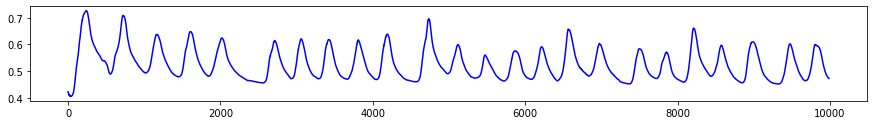

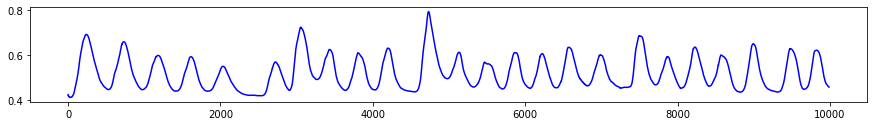

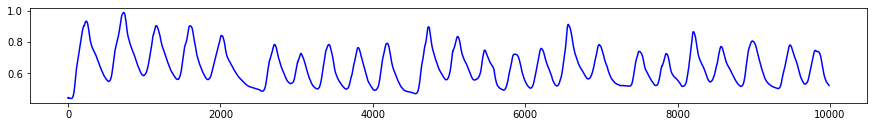

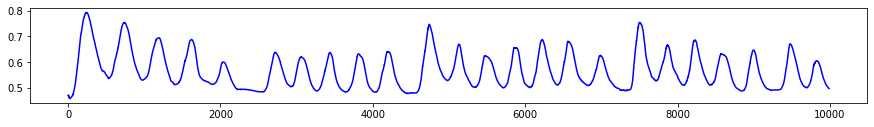

In [24]:
x = range(0, len(df_test))
fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,1)
plt.plot(x, df_test['1'], 'b')
plt.show()

fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,2)
plt.plot(x, df_test['2'], 'b')
plt.show()

fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,3)
plt.plot(x, df_test['3'], 'b')
plt.show()

fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,4)
plt.plot(x, df_test['4'], 'b')
plt.show()

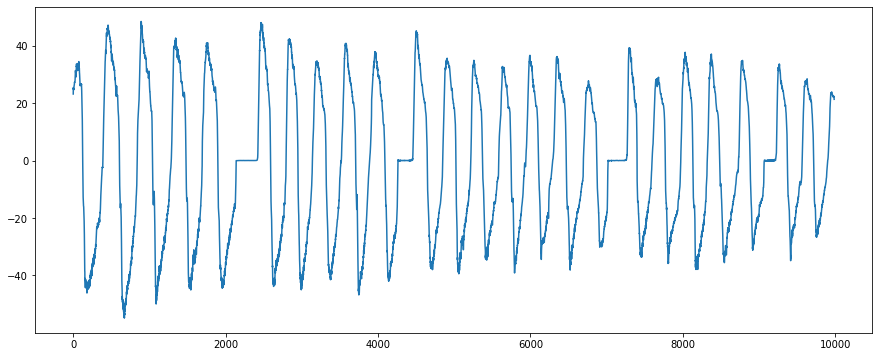

In [39]:
fig = plt.figure(figsize = (15, 6))
plt.plot(flow_test['Flow'])

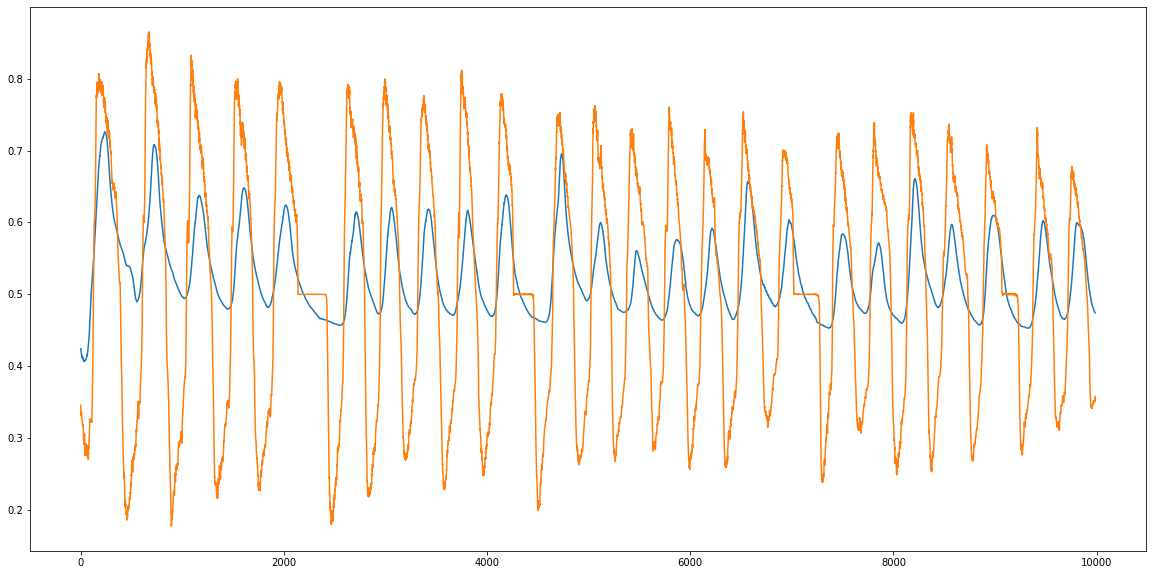

In [58]:
flow_test['a'] = (flow_test['Flow'] / 150) - 0.5
fig = plt.figure(figsize = (20, 10))
plt.plot(x, df_test['1'], x, flow_test['a']*-1)

In [27]:
flow_test.drop('a', inplace = True, axis = 1)

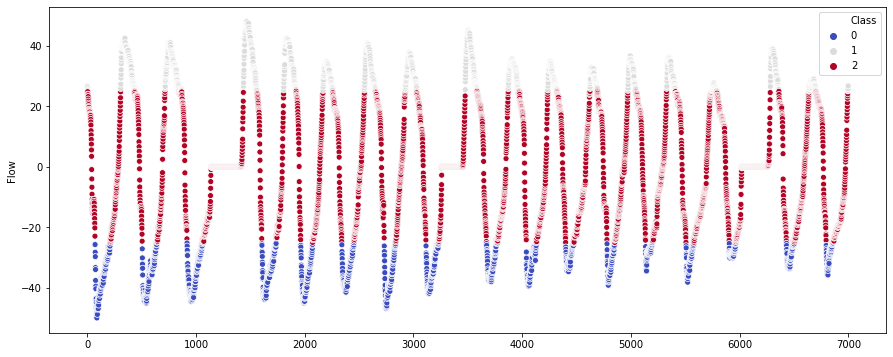

In [41]:
fig = plt.figure(figsize = (15, 6))
sns.scatterplot(y = flow_test['Flow'][1000:8000], x = range(0, 7000), hue = df_test['Class'][1000:8000], palette = 'coolwarm')

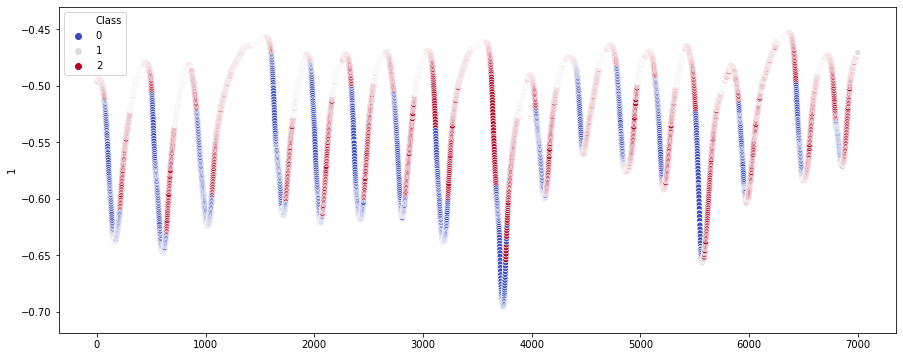

In [42]:
fig = plt.figure(figsize = (15, 6))
sns.scatterplot(y = df_test['1'][1000:8000]*-1, x = range(0, 7000), hue = df_test['Class'][1000:8000], palette = 'coolwarm')

In [30]:
test_sensors = df_test.drop('Class', axis = 1)
test_sensors.drop('hours', inplace = True, axis = 1)
test_sensors.drop('minutes', inplace = True, axis = 1)
test_sensors.drop('seconds', inplace = True, axis = 1)

# Create the classification matrix
test_class = df_test['Class']
test_class = pd.DataFrame(test_class, index = None, columns = ['Class'])

#### model testing - random forest

In [31]:
test_predictions = rf_model.predict(test_sensors)
print(" accuracy = ", accuracy_score(test_class, test_predictions))
print(confusion_matrix(test_class, test_predictions))
print("\n")

print('Random Forest - Testing')
print('\n')
print(classification_report(test_class, test_predictions))

 accuracy =  0.7191911102212434
[[1776    0  423]
 [  19  996 1217]
 [ 478  668 4412]]


Random Forest - Testing


              precision    recall  f1-score   support

           0       0.78      0.81      0.79      2199
           1       0.60      0.45      0.51      2232
           2       0.73      0.79      0.76      5558

    accuracy                           0.72      9989
   macro avg       0.70      0.68      0.69      9989
weighted avg       0.71      0.72      0.71      9989



In [32]:
testPredictions = classSwitch(test_predictions)
testClass = classSwitch(list(test_class['Class']))
print('Random Forest - Testing')
print('\n')
print(classification_report(testClass, testPredictions))

Random Forest - Testing


              precision    recall  f1-score   support

           0       0.87      0.76      0.81      5862
           1       0.71      0.84      0.77      4126
           2       0.12      1.00      0.22         1

    accuracy                           0.79      9989
   macro avg       0.57      0.87      0.60      9989
weighted avg       0.81      0.79      0.79      9989



### model testing - deep learning

In [33]:
test_predictions = model.predict(test_sensors)

final_pred_test = []
for score in range(0, len(test_predictions)):
    final_pred_test.append(np.argmax(test_predictions[score]))

print('Keras Model - Testing')
print('\n')
print(classification_report(test_class, final_pred_test))

Keras Model - Testing


              precision    recall  f1-score   support

           0       0.80      0.73      0.76      2199
           1       0.56      0.46      0.50      2232
           2       0.71      0.78      0.74      5558

    accuracy                           0.70      9989
   macro avg       0.69      0.66      0.67      9989
weighted avg       0.69      0.70      0.69      9989



In [34]:
testPredictions = classSwitch(final_pred_test)
testClass = classSwitch(list(test_class['Class']))
print('Keras Model - Testing')
print('\n')
print(classification_report(testClass, testPredictions))

Keras Model - Testing


              precision    recall  f1-score   support

           0       0.88      0.77      0.82      5862
           1       0.72      0.82      0.77      4126
           2       0.01      1.00      0.02         1

    accuracy                           0.79      9989
   macro avg       0.53      0.86      0.54      9989
weighted avg       0.81      0.79      0.80      9989



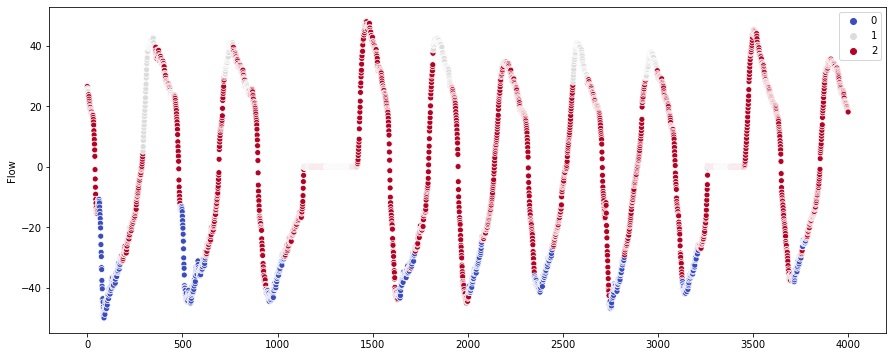

In [49]:
fig = plt.figure(figsize = (15, 6))
sns.scatterplot(y = flow_test['Flow'][1000:5000], x = range(0, 4000), hue = final_pred_test[1000:5000], palette = 'coolwarm')

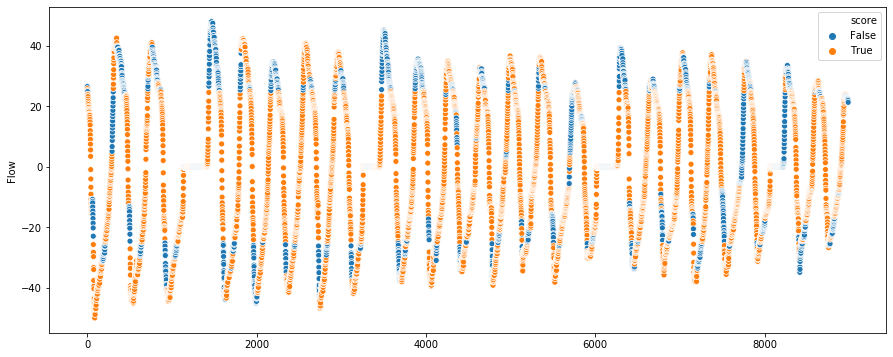

In [55]:
test_class['score'] = test_class['Class'] == final_pred_test
fig = plt.figure(figsize = (15, 6))
sns.scatterplot(y = flow_test['Flow'][1000:], x = range(0, 8989), hue = test_class['score'][1000:])

#### Save TFLite Model

keras_file = "model_4.h5"
keras.models.save_model(model, keras_file)
converter = tf.lite.TocoConverter.from_keras_model_file('model_4.h5')
tflite_model = converter.convert()
open("model_4.tflite", "wb").write(tflite_model)